# **New York City Airbnb Listing Dataset Analysis**

This dataset is related to Airbnb listings in New York City, providing information about various aspects of rental properties and hosts.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [60]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [61]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data Cleaning**

In [62]:
columns_to_drop = ['id', 'host_id', 'host_name', 'last_review']
df = df.drop(columns=columns_to_drop)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [64]:
df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [65]:
df['reviews_per_month'].fillna(0, inplace=True)

In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [68]:
df['price_per_night'] = df['price'] / df['minimum_nights']

# **Exploratory Data Analysis**

In [69]:
sns.set(style='whitegrid')
sns.set_palette('husl')

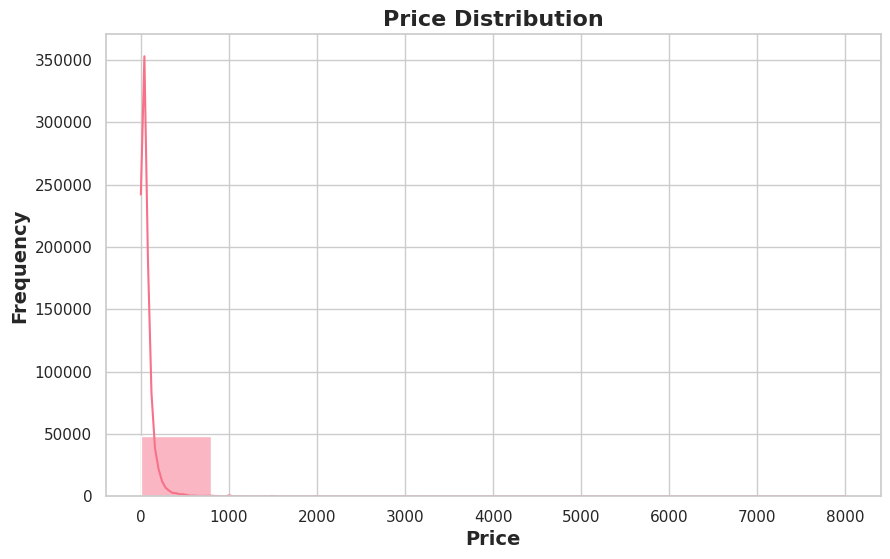

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_per_night', bins=10, kde=True)
plt.xlabel('Price', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Price Distribution', fontsize=16, fontweight='bold')
plt.show()

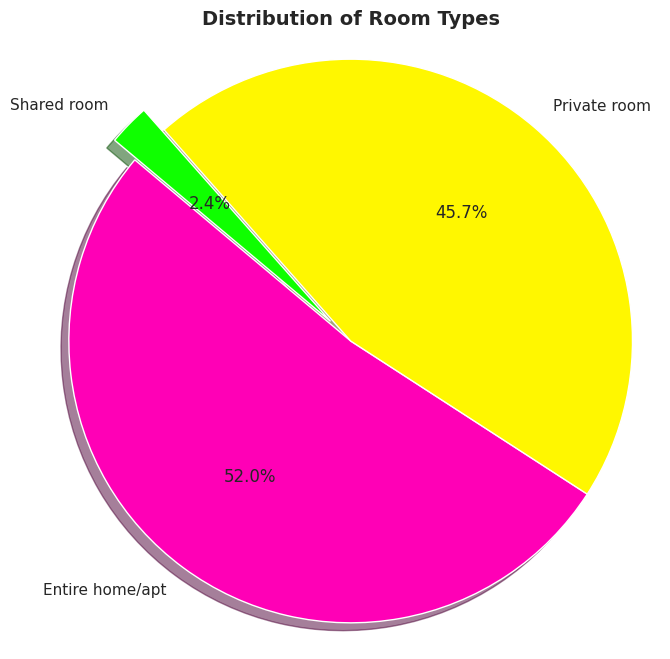

In [71]:
room_type_counts = df['room_type'].value_counts()
explode = (0, 0, 0.1)
colors = ['#FF00B6', '#FFF700', '#0FFF00']
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors)

plt.title("Distribution of Room Types", fontweight='bold', fontsize=14)

plt.axis('equal')
plt.show()

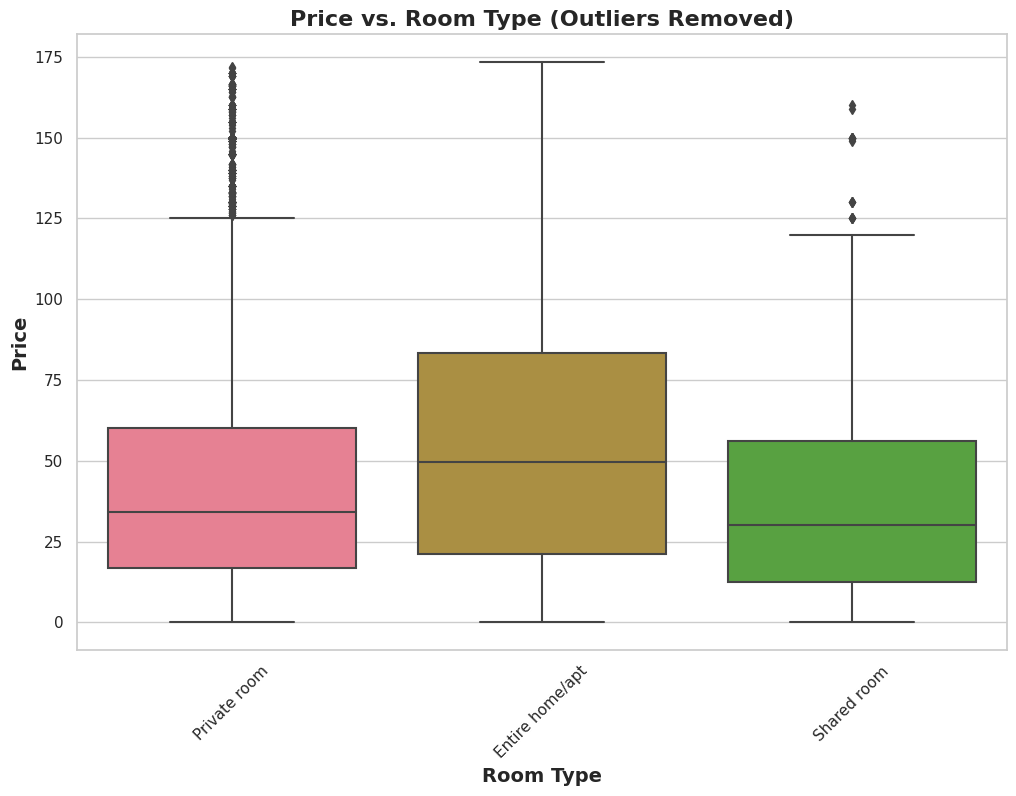

In [72]:
Q1 = df['price_per_night'].quantile(0.25)
Q3 = df['price_per_night'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='room_type', y='price_per_night')
plt.xlabel('Room Type', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.title('Price vs. Room Type (Outliers Removed)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


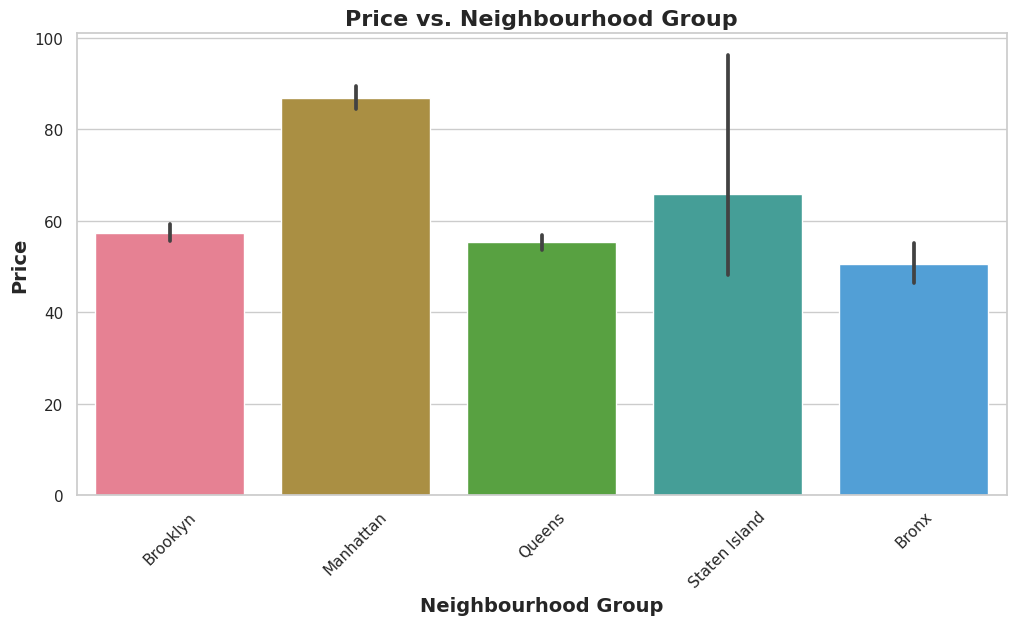

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price_per_night')
plt.xlabel('Neighbourhood Group', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.title('Price vs. Neighbourhood Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-74-84e4ec726fa9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


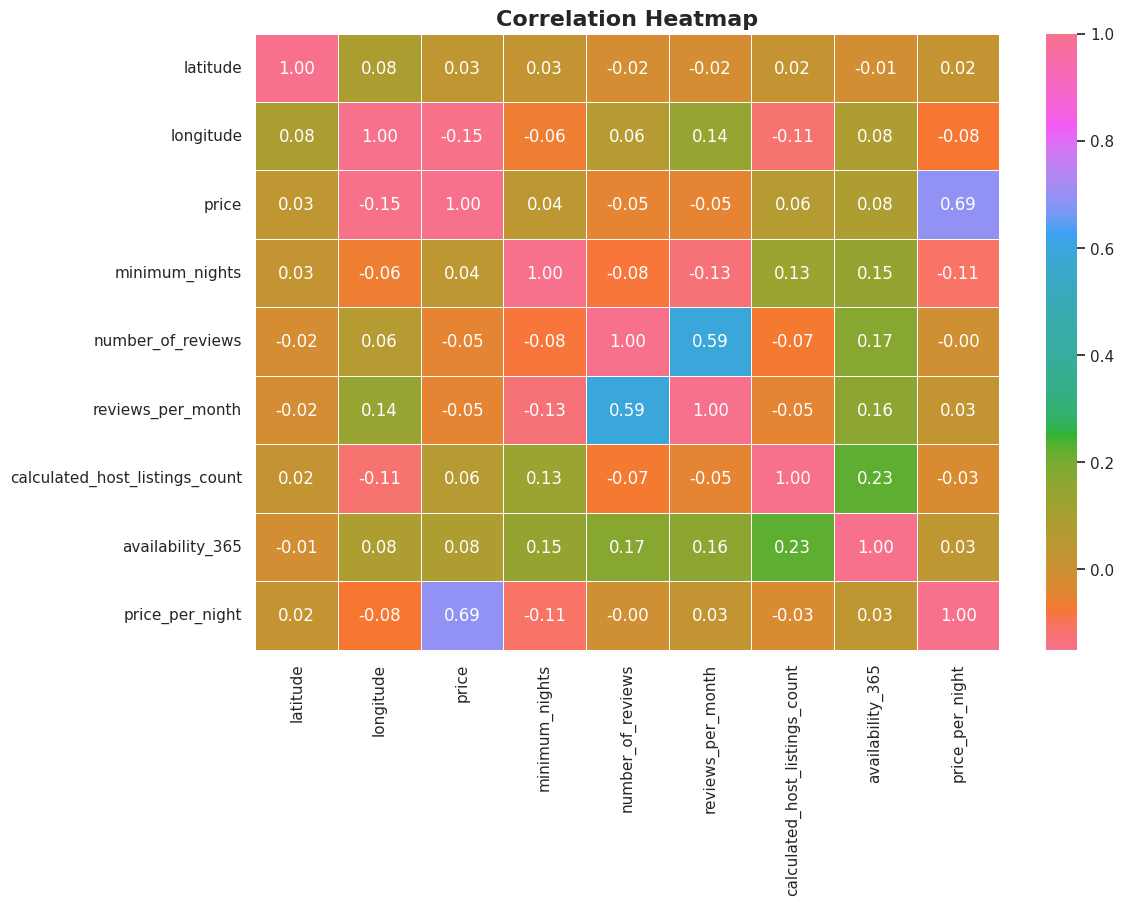

In [74]:
plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("husl", as_cmap=True)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap=custom_palette, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

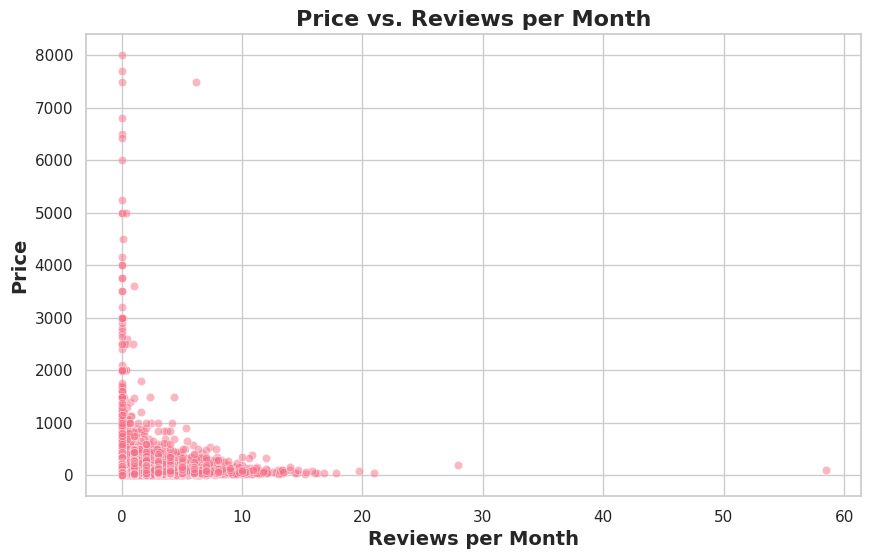

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reviews_per_month', y='price_per_night', alpha=0.5)
plt.xlabel('Reviews per Month', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.title('Price vs. Reviews per Month', fontsize=16, fontweight='bold')
plt.show()

In [76]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,149.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,225.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,50.0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,89.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,8.0


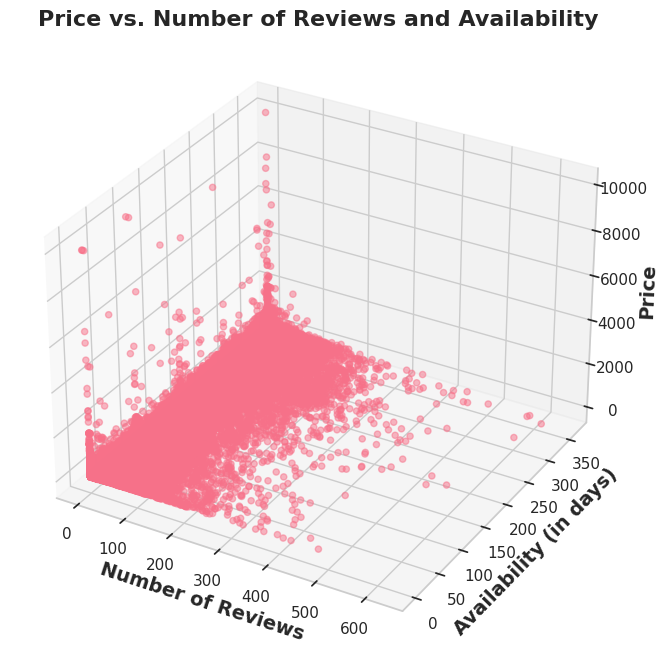

In [77]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['number_of_reviews'], df['availability_365'], df['price'], alpha=0.5)
ax.set_xlabel('Number of Reviews', fontsize=14, fontweight='bold')
ax.set_ylabel('Availability (in days)', fontsize=14, fontweight='bold')
ax.set_zlabel('Price', fontsize=14, fontweight='bold')
ax.set_title('Price vs. Number of Reviews and Availability', fontsize=16, fontweight='bold')
plt.show()


In [78]:
import folium
import random
from IPython.display import display

num_markers_to_display = 200

sampled_df = df.sample(n=num_markers_to_display, random_state=42)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=12, width=600, height=400)

for index, row in sampled_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Listing: {row['name']}<br>Price: ${row['price']:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

display(m)

# **Hypothesis Tests**

**1. Hypothesis Test: Comparing the mean prices of Private rooms and Entire home/apartment listings**

**Null Hypothesis (H0):** The mean price of Private room listings is equal to the mean price of Entire home/apartment listings.

**Alternative Hypothesis (H1):** The mean price of Private room listings is not equal to the mean price of Entire home/apartment listings.

In [79]:
private_room_prices = df[df['room_type'] == 'Private room']['price']
entire_home_prices = df[df['room_type'] == 'Entire home/apt']['price']

t_statistic, p_value = stats.ttest_ind(private_room_prices, entire_home_prices)

alpha = 0.05

In [80]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -56.71948693368472
P-value: 0.0


In [81]:
if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


it means that there is enough evidence to conclude that the mean price of Private room listings is statistically different from the mean price of Entire home/apartment listings at the 0.05 significance level

**2. Hypothesis Test: Comparing the mean prices of listings in Brooklyn and Manhattan**

**Null Hypothesis (H0):** The mean price of listings in Brooklyn is equal to the mean price of listings in Manhattan.

**Alternative Hypothesis (H1):** The mean price of listings in Brooklyn is not equal to the mean price of listings in Manhattan.

In [82]:
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']

t_statistic, p_value = stats.ttest_ind(brooklyn_prices, manhattan_prices)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -29.99486321954741
P-value: 1.3765622990778747e-195


In [83]:
if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


it means that there is enough statistical evidence to conclude that the mean prices of listings in Brooklyn and Manhattan are different at the 0.05 significance level

# **Machine Learning**

**Linear Regression**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
features = ['latitude', 'longitude', 'availability_365', 'minimum_nights']
target = 'price'

In [86]:
x = df[features]
y = df[target]

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 56)

In [88]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(x_test)

In [90]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [91]:
print(mse)

79561.83224457987


In [92]:
print(r2)

0.026280476306567713


**Gradient Boosting**

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 58)

In [95]:
model = GradientBoostingRegressor(n_estimators=120, learning_rate = 0.1, random_state = 58)
model.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=120, random_state=58)

In [96]:
y_pred = model.predict(x_test)

In [97]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [98]:
print(mse)

50272.23865093438


In [99]:
print(r2)

0.009308275249078957


**Random Forest**

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

In [102]:
model = RandomForestRegressor(n_estimators=120, random_state = 38)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=38)

In [103]:
y_pred = model.predict(x_test)

In [104]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [105]:
print(mse)

67646.1056787099


In [106]:
print(r2)

-0.0006573492247143875


**Hence, the best model we can get to the above dataset is Gradient Boosting with the MSE of 50272.23**